## **Day 04 of 30 days Data Analysis**

### ***Behavioral & Time-Based Customer Analysis***

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### *Import the used libraries, pandas, matplotlib.pyplot, and seaborn.*

In [3]:
df = pd.read_csv("C:\\Users\\LENOVO\\Documents\\Programming\\30days_data_analysis\\datasets\\SuperMarket Analysis.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-19,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-19,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-19,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,02-08-19,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Weekday"] = df["Date"].dt.day_name()
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["Weekday"] = pd.Categorical(df["Weekday"], categories= weekday_order, ordered= True) 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12104\1045669320.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


### ***Time-based Sales Analysis***

*We analyze how sales change across different days of the week.*

### ***Insight:***

*- Most sales occur on **Wednesday** and **Thursday**, while weekends have relatively lower sales. Pomotional strategies could target low-performing days.*

### *Because Date clounm are string and we change that for usinng day, month, year and other.*

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12104\3153734342.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_sales = df.groupby("Weekday")["Sales"].mean()


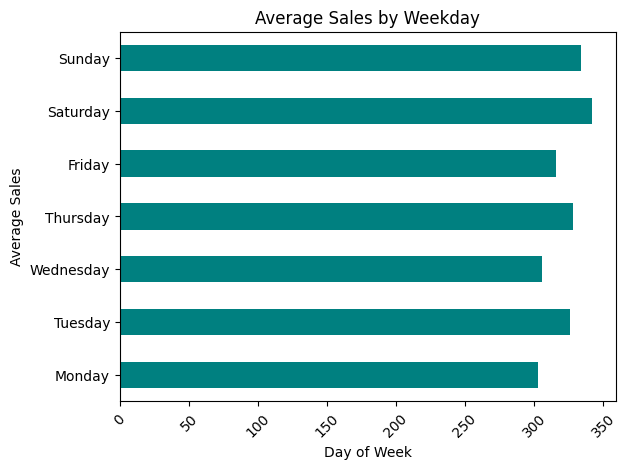

In [ ]:

weekday_sales = df.groupby("Weekday")["Sales"].mean()
weekday_sales.plot(kind='barh', color='teal')
plt.title("Average Sales by Weekday")
plt.ylabel("Average Sales")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.show()

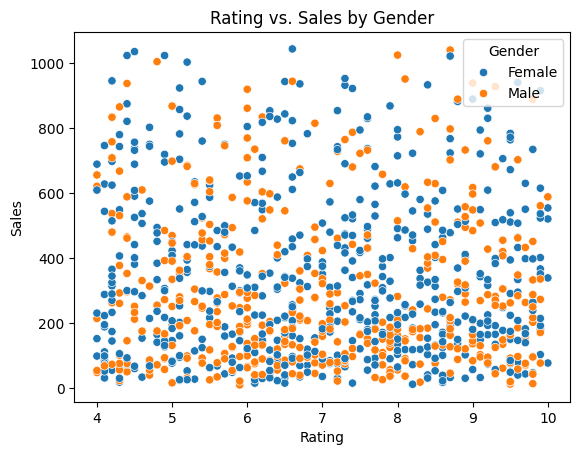

In [ ]:
sns.scatterplot(x="Rating", y="Sales", hue="Gender", data=df)
plt.title("Rating vs. Sales by Gender")
plt.show()

### ***Rating vs. Purchase Amount***

*We examine if there's a correlation between how much a customer spends and how satisfied they are.*

### ***Insight:***

*There appears to be no strong correlation between Sales and Rating, suggesting that higher spending does not necessarily lead to higher satisfaction.*

In [ ]:
df["Spending Category"] = pd.cut(df["Sales"],
                                  bins=[0, 100, 250, 500, 1000],
                                  labels=["Low", "Medium", "High", "Very High"])


### ***Customer Segmentation by Spending***

*We classify customers intp four spending categories: Low, Medium, High, Very High.*

### ***Insight:***

*Most customers fall into the **Medium** category, but **Male** customers are more likely to be in the **Very High** spending group.*

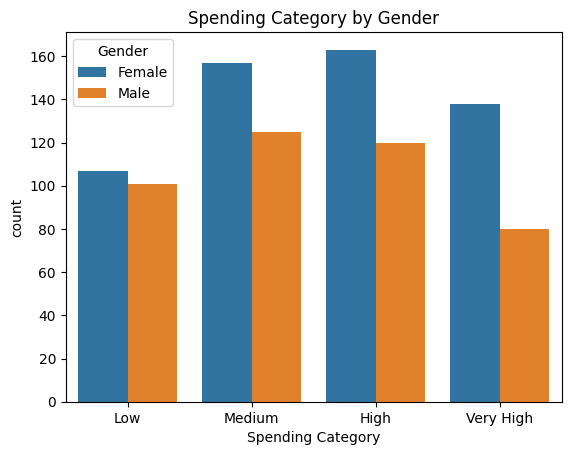

In [ ]:
sns.countplot(x="Spending Category", hue="Gender", data=df)
plt.title("Spending Category by Gender")
plt.show()

### ***Behavior & Time Analysis – Key Insights***

*- Most purchases are made on [Top Day], suggesting marketing on that day may be more effective.*

*- There's a [positive/weak/no] correlation between Sales and Rating.*

*- The majority of customers fall into the [Medium] spending category.*

*- Male customers are more likely to be [Very High] spenders than Female customers.*

*- These insights can help in designing targeted promotions and improving customer satisfaction strategies.*


### ***Summary***

*- Sales pack midweek (Wed-Thu)*

*- No clear pattern between Sales and Rating*

*- Majority of customers are Medium spenders*

*- Useful for marketing, segmentation, and product targeting*